##Instalando a lib

In [1]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=98af44cad56deb82a240b949d2da4bead1d04dde734fc9056e56875de1b7360b
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built minisom


##Carregando o arquivo

In [2]:
from google.colab import drive

inicial_path = '/content/drive'
drive.mount(inicial_path)

stringPath = inicial_path + '/My Drive/Inteligência Artificial/UA 12/aula 22/Python/figura.png'

Mounted at /content/drive


##Importando libs

In [6]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

##Lendo a imagem e readequando a matrix de pixels

(196, 169, 3)
(33124, 3)


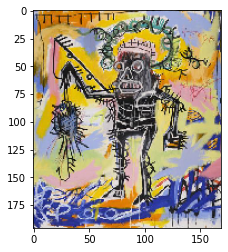

In [13]:
# read the image
img = plt.imread(stringPath)

#Apresentando a imagem
plt.imshow(img)

#Shape
# Image Dimension : (149, 200, 4)
# A altura representa o número de linhas de pixels na imagem ou o número de pixels em cada coluna da matriz da imagem.
# A largura representa o número de colunas de pixels na imagem ou o número de pixels em cada linha da matriz da imagem.
# Número de canais representa o número de componentes usados ​​para representar cada pixel.
print(img.shape)

# reshaping the pixels matrix
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3))

print(pixels.shape)

##Criando a rede e o treinamento

In [ ]:
# SOM initialization and training
print('training...')
som = MiniSom(3, 3, 3, sigma=1., learning_rate=0.2, neighborhood_function='bubble')  # 3x3 = 9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(pixels, 500)

##Avaliando

In [ ]:
##Quantidade de pixels da imagem
print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
print('building new image...')
clustered = np.zeros(img.shape)

for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(img.shape[0], img.shape[1]))] = q
print('done.')

##Plotando

training...
quantization...
building new image...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: 'shape' argument should be used instead of 'dims'


done.


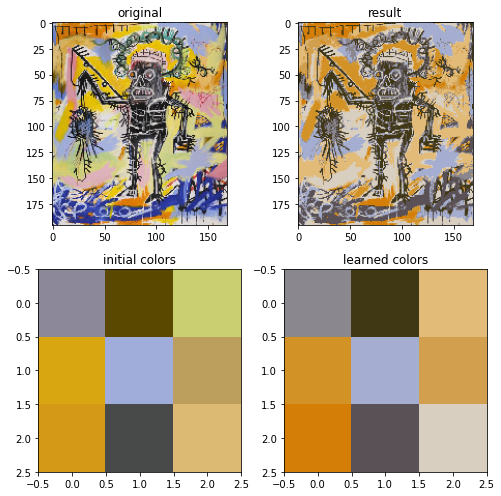

In [5]:
# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()